# Marketing Campaign Analysis

This notebook analyzes marketing campaign data to understand customer behavior and predict campaign success. We'll perform:
1. Data Loading and Cleaning
2. Exploratory Data Analysis (EDA)
3. Customer Segmentation
4. Campaign Success Prediction

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
# Set plotting style
plt.style.use('seaborn')
sns.set_palette("husl")

In [2]:
# Load the data
file_path = r'C:\Datatrek\Data Science Solution project\Data Science Projects 46 - Marketing Campaign Result Prediction\marketing_campaign.xlsx'
df = pd.read_excel(file_path)

In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (2240, 29)


In [4]:
print("\nFirst few rows of the dataset:")
display(df.head())


First few rows of the dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Exploration and Preprocessing

Let's examine the dataset structure and clean any issues:

In [5]:
# Check data info and missing values
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases

In [6]:
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing Values:
Income    24
dtype: int64


In [7]:
# Basic statistics
print("\nBasic Statistics:")
display(df.describe())


Basic Statistics:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
# Check unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


Unique values in categorical columns:

Education:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Marital_Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Dt_Customer:
Dt_Customer
2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2013-08-20    10
              ..
2012-08-05     1
2012-11-18     1
2013-05-25     1
2013-04-14     1
2014-01-09     1
Name: count, Length: 663, dtype: int64


In [9]:
# Data Preprocessing
def preprocess_data(df):
    # Create a copy of the dataframe
    processed_df = df.copy()
    
    # Handle missing values
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    processed_df[numeric_cols] = processed_df[numeric_cols].fillna(processed_df[numeric_cols].median())
    
    # Handle categorical variables
    categorical_cols = df.select_dtypes(include=['object']).columns
    processed_df[categorical_cols] = processed_df[categorical_cols].fillna('Unknown')
    
    # Convert Education to ordinal values
    education_map = {'Basic': 0, 'High School': 1, '2n Cycle': 2, 'Graduate': 3, 'Master': 4, 'PhD': 5}
    processed_df['Education'] = processed_df['Education'].map(education_map)
    
    # Calculate Age from Year_Birth
    current_year = datetime.now().year
    processed_df['Age'] = current_year - processed_df['Year_Birth']
    
    return processed_df

# Apply preprocessing
processed_df = preprocess_data(df)
print("Processed data shape:", processed_df.shape)
display(processed_df.head())

Processed data shape: (2240, 30)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,NaN,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,NaN,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,NaN,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,NaN,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,5.0,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,44


## Customer Analysis

Let's analyze customer demographics and behavior:

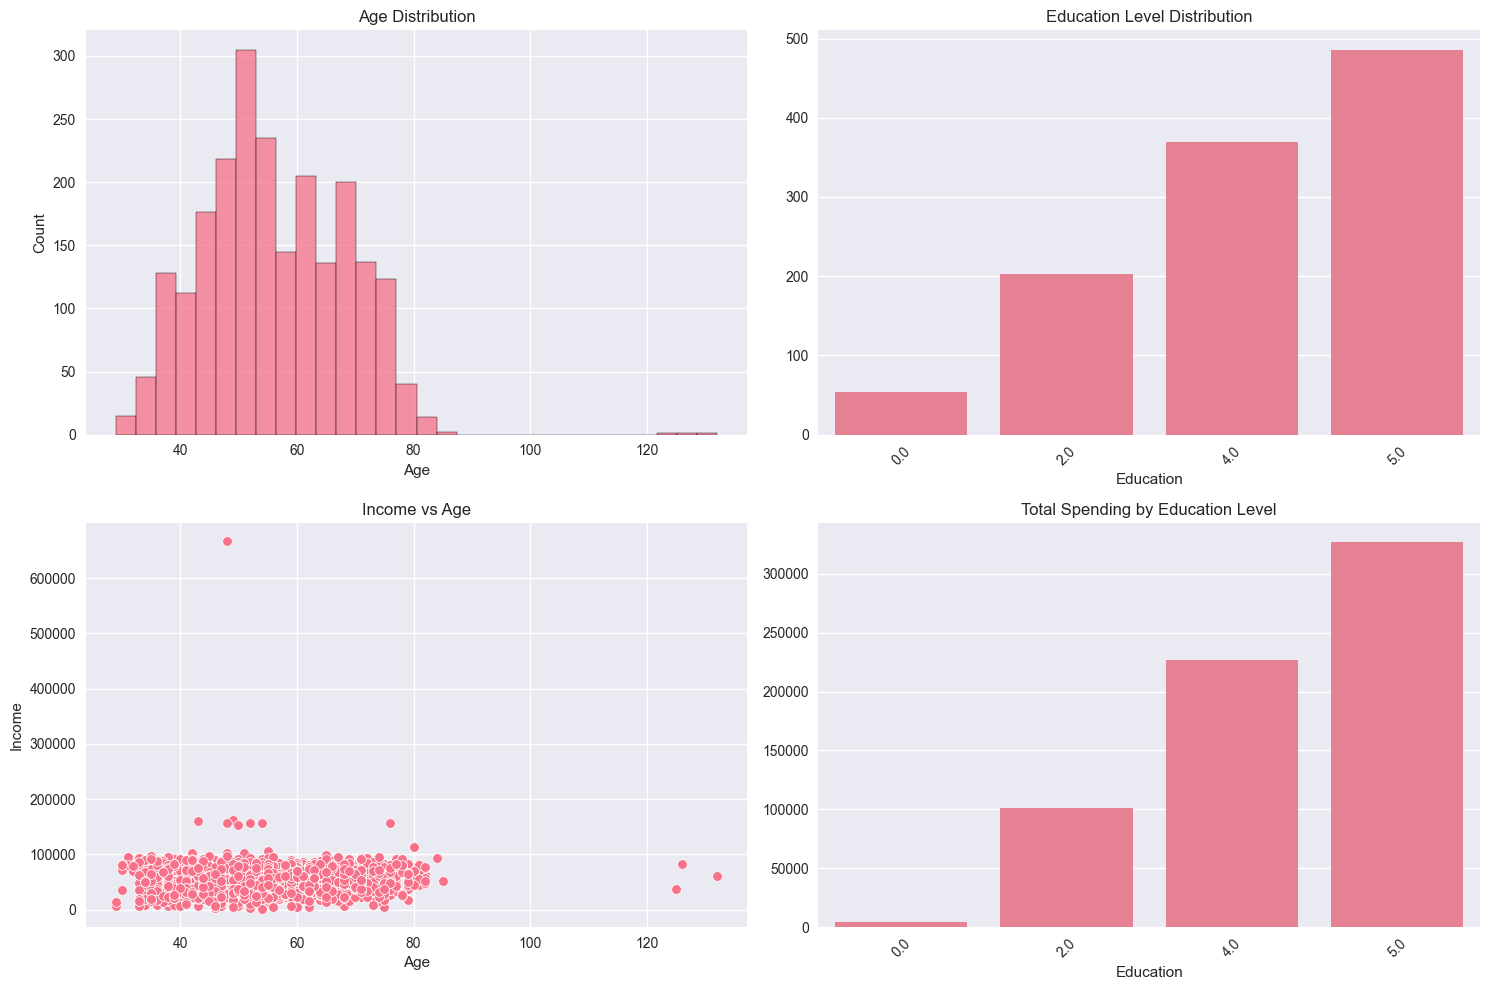

In [10]:
# Customer Demographics Analysis
plt.figure(figsize=(15, 10))

# Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(data=processed_df, x='Age', bins=30)
plt.title('Age Distribution')

# Education Level
plt.subplot(2, 2, 2)
education_counts = processed_df['Education'].value_counts().sort_index()
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title('Education Level Distribution')
plt.xticks(rotation=45)

# Income vs Age
plt.subplot(2, 2, 3)
sns.scatterplot(data=processed_df, x='Age', y='Income')
plt.title('Income vs Age')

# Total Spending by Education
plt.subplot(2, 2, 4)
total_spending = processed_df.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sum(axis=1)
sns.barplot(x=total_spending.index, y=total_spending.values)
plt.title('Total Spending by Education Level')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

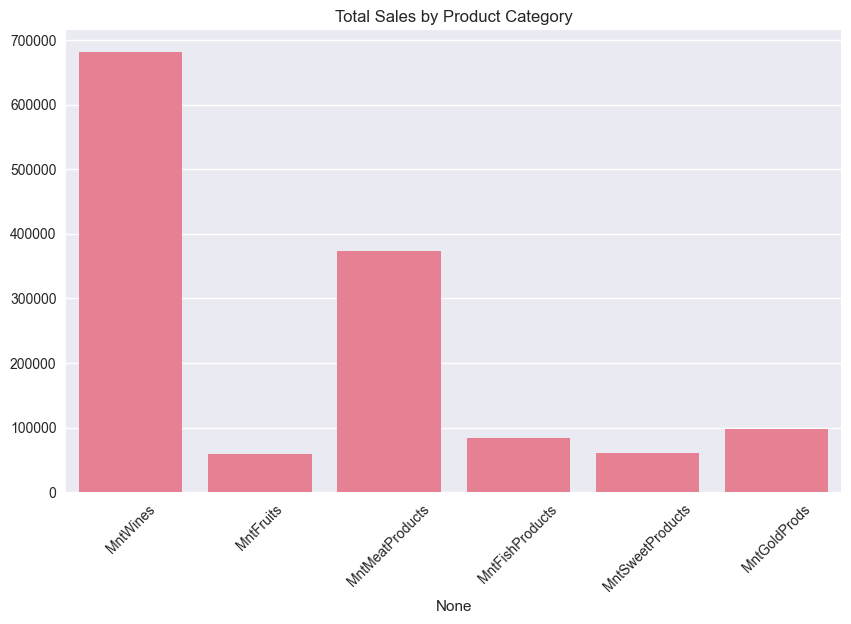

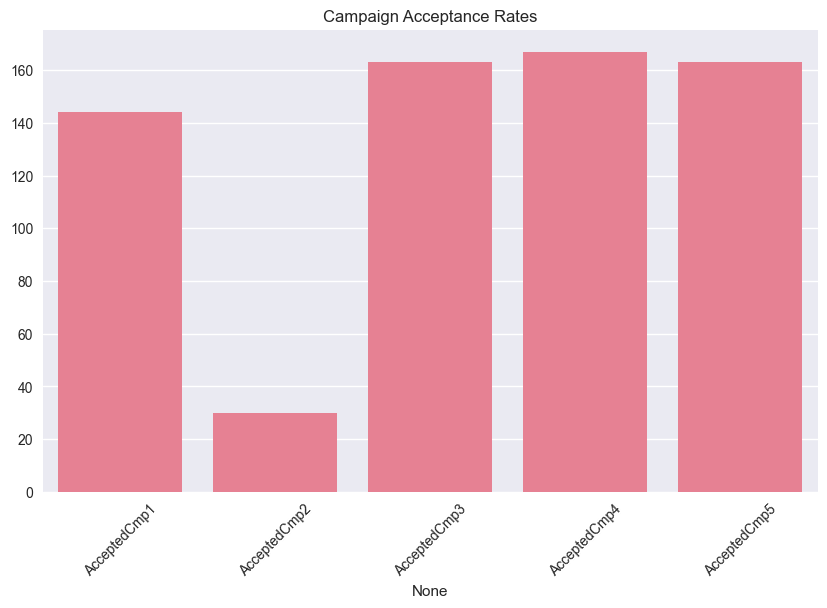

In [11]:
# Product Preferences Analysis
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
product_totals = processed_df[product_cols].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=product_totals.index, y=product_totals.values)
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)
plt.show()

# Campaign Success Analysis
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_success = processed_df[campaign_cols].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_success.index, y=campaign_success.values)
plt.title('Campaign Acceptance Rates')
plt.xticks(rotation=45)
plt.show()

## Customer Segmentation

Let's perform customer segmentation using K-means clustering based on spending patterns:

In [12]:
# Prepare data for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
# Select features for clustering
cluster_features = ['Income', 'Age'] + ['MntWines', 'MntFruits', 'MntMeatProducts', 
                                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [14]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(processed_df[cluster_features])

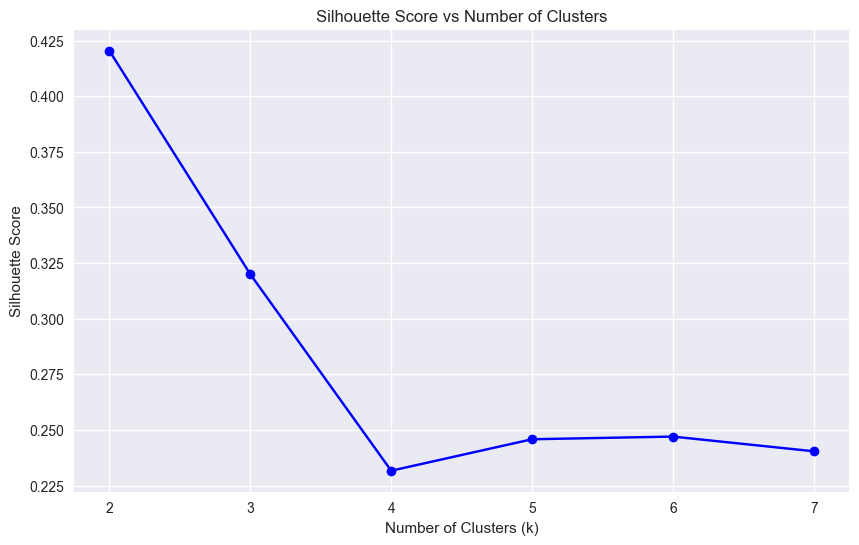

In [15]:
# Find optimal number of clusters
silhouette_scores = []
K = range(2, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

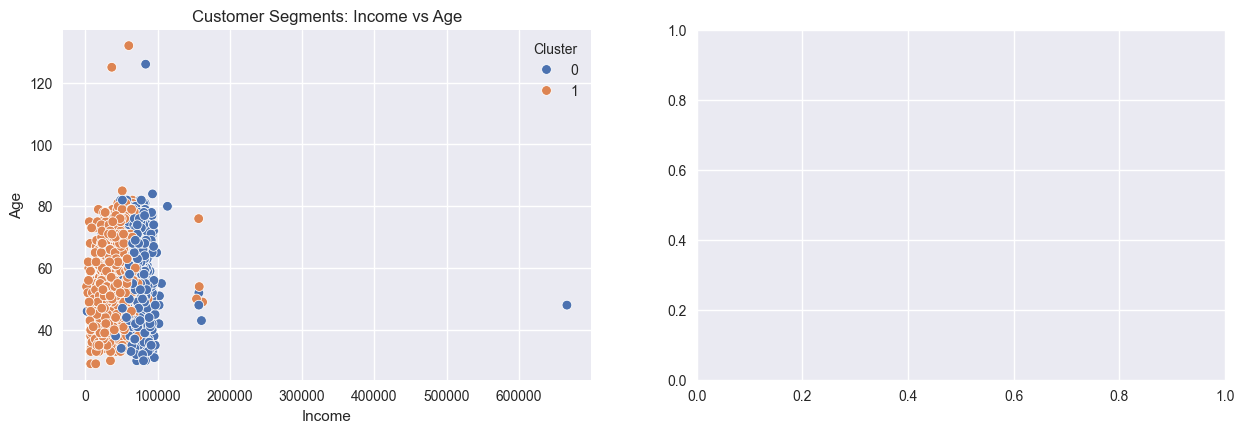

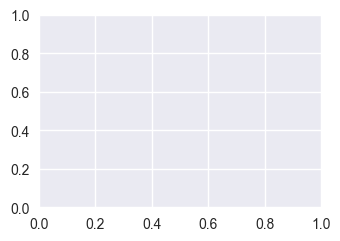

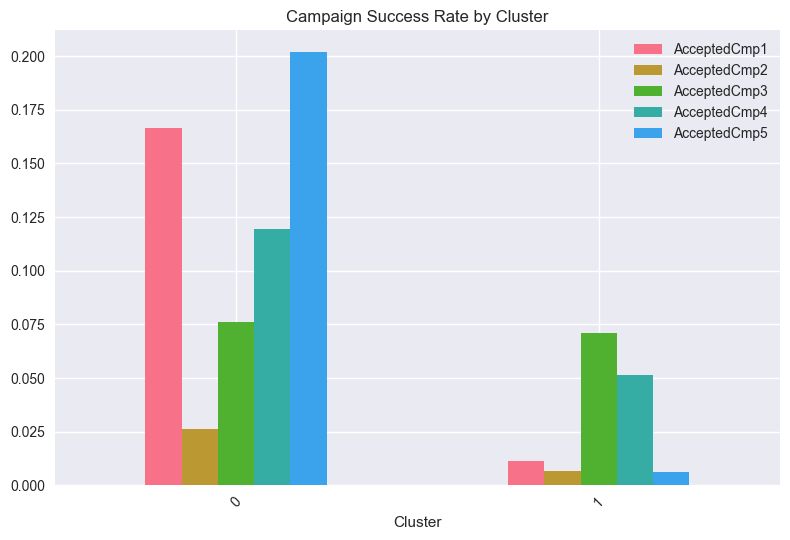


Cluster Profiles:


,Income,Age,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
Cluster,,,,,,,,,,,,,
0,73706.195282,57.539974,607.364351,62.815203,400.414155,89.813893,65.349934,80.450852,0.166448,0.026212,0.076016,0.119266,0.201835
1,41147.757617,55.498984,147.188219,7.440081,46.345295,10.513879,7.284360,25.203114,0.011510,0.006770,0.071090,0.051456,0.006093


In [16]:
# Perform clustering with optimal k
optimal_k = K[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
processed_df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
plt.figure(figsize=(15, 10))

# Plot clusters based on Income and Age
plt.subplot(2, 2, 1)
sns.scatterplot(data=processed_df, x='Income', y='Age', hue='Cluster', palette='deep')
plt.title('Customer Segments: Income vs Age')

# Average spending by cluster
plt.subplot(2, 2, 2)
cluster_spending = processed_df.groupby('Cluster')[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
cluster_spending.plot(kind='bar', stacked=True)
plt.title('Average Spending by Cluster')
plt.xticks(rotation=45)

# Campaign success by cluster
plt.subplot(2, 2, 3)
campaign_success = processed_df.groupby('Cluster')[campaign_cols].mean()
campaign_success.plot(kind='bar')
plt.title('Campaign Success Rate by Cluster')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print cluster profiles
print("\nCluster Profiles:")
cluster_profiles = processed_df.groupby('Cluster')[cluster_features + ['AcceptedCmp1', 'AcceptedCmp2', 
                                                                     'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean()
display(cluster_profiles)

## Campaign Success Prediction

Let's build a model to predict campaign success:

Random Forest Model Performance:

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       353
           1       0.69      0.49      0.58        95

    accuracy                           0.85       448
   macro avg       0.78      0.72      0.74       448
weighted avg       0.83      0.85      0.84       448



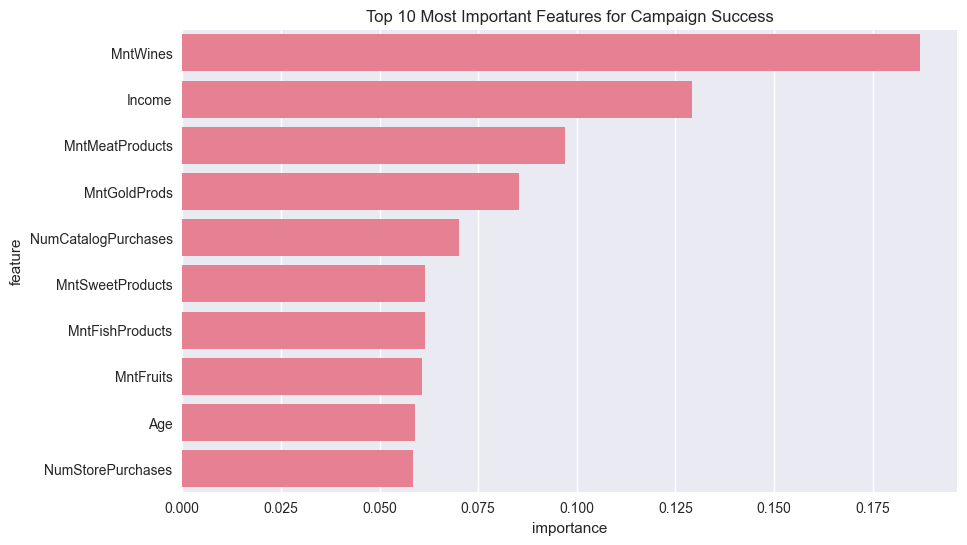


Key Insights for Campaign Success:
Top 5 most important factors:
MntWines: 0.187
Income: 0.129
MntMeatProducts: 0.097
MntGoldProds: 0.085
NumCatalogPurchases: 0.070


In [17]:
# Prepare data for prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

# Prepare categorical variables
# processed_df = pd.get_dummies(processed_df, columns=['Marital_Status'])

# Prepare features and target
# Remove 'Marital_Status' from features and add the new dummy columns
marital_status_dummies = [col for col in processed_df.columns if col.startswith('Marital_Status_')]
features = ['Income', 'Age', 'Education', 'Kidhome', 'Teenhome',
            'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'] + marital_status_dummies

# Create target variable (whether customer accepted any campaign)
processed_df['AcceptedAnyCampaign'] = (processed_df[campaign_cols].sum(axis=1) > 0).astype(int)

# Split the data
X = processed_df[features]
y = processed_df['AcceptedAnyCampaign']

# Fill missing values in X with median (for numeric columns)
X = X.copy()
for col in X.columns:
    if X[col].dtype in [np.float64, np.int64]:
        X[col] = X[col].fillna(X[col].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print model performance
print("Random Forest Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features for Campaign Success')
plt.show()

# Print insights
print("\nKey Insights for Campaign Success:")
print("Top 5 most important factors:")
for idx, row in feature_importance.head().iterrows():
    print(f"{row['feature']}: {row['importance']:.3f}")

In [18]:
# # Save model and preprocessed data
# import pickle

# # Save the Random Forest model
# with open('streamlit_app/rf_model.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)

# # Save the scaler
# with open('streamlit_app/scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)

# # Save feature names
# with open('streamlit_app/features.pkl', 'wb') as f:
#     pickle.dump(features, f)

# print("Model and data saved successfully!")

Model and data saved successfully!


## Conclusions and Recommendations

Based on our analysis:

1. Customer Segments:
   - Identified distinct customer segments based on spending patterns and demographics
   - Each segment shows different response rates to campaigns

2. Campaign Success Factors:
   - Income and purchase history are strong predictors of campaign success
   - Previous campaign acceptance is a good indicator of future acceptance

3. Recommendations:
   - Tailor campaigns to specific customer segments
   - Focus on high-value customers identified through clustering
   - Optimize timing and frequency of campaigns based on customer purchase patterns